In [11]:
import pandas as pd
import numpy as np
from mordred import Calculator, descriptors

from constants import mandatory_features

path = r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\updated_features\remained_features_25.01.csv'

df = pd.read_csv(path, index_col=0)

features_2D = Calculator(descriptors, ignore_3D=True).descriptors
features_2D_names = []
for feature_name in features_2D:
    features_2D_names.append(str(feature_name))

amount_of_2D_features, amount_of_3D_features = 0, 0
features_2D_in_my_data, features_3D_in_my_data = [], []
for key_name in df.columns:
    if key_name in features_2D_names:
        features_2D_in_my_data.append(key_name)
        amount_of_2D_features += 1
    else:
        features_3D_in_my_data.append(key_name)
        amount_of_3D_features += 1

mandatory_features_remained = []
for mandatory_feature in mandatory_features:
    if mandatory_feature in df.columns:
        mandatory_features_remained.append(mandatory_feature)
    # if "mor" not in feature_3D_in_my_data.lower():
    #     print(feature_3D_in_my_data)

print(f"amount of 2D features: {amount_of_2D_features}, amount of 3d: {amount_of_3D_features}")
print(len(df.keys()))

features_3d_df = df[mandatory_features_remained]
corr_matrix = features_3d_df.corr()

corr_matrix_values = corr_matrix.values

count = 0
for row_index in range(len(corr_matrix_values)):
    for column_index in range(row_index+1, len(corr_matrix_values)):
        if corr_matrix.keys()[column_index] == 'angle_X2X1R1' or corr_matrix.keys()[column_index] == 'angle_R1X1R2' or \
            corr_matrix.keys()[row_index] == 'angle_X2X1R1' or corr_matrix.keys()[row_index] == 'angle_R1X1R2':
            if abs(corr_matrix_values[row_index, column_index]) > 0.5:
                print(corr_matrix.keys()[column_index], corr_matrix.keys()[row_index], corr_matrix_values[row_index, column_index])
        # if abs(corr_matrix_values[row_index, column_index]) > 0.7:
        #     count += 1
        #     print(corr_matrix.keys()[column_index], corr_matrix.keys()[row_index], corr_matrix_values[row_index, column_index])

print(count)

# corr_matrix_sorted = corr_matrix.keys().sort_values()
# print(corr_matrix_sorted)

# print(features_3d_df['Mor03'])

amount of 2D features: 433, amount of 3d: 94
527
angle_R1X1R2 dihedral_angle 0.5650156920534888
angle_R1X1R2 angle_X2X1R1 0.8078383527530861
nHRing angle_X2X1R1 0.5621659488195434
nAHRing angle_X2X1R1 0.5621659488195434
angle_R1X1R2 angle_R2X2R1 0.5748809096047237
0


In [25]:
from scipy import stats
import pandas as pd
import numpy as np

path = r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\updated_features\remained_features_25.01.csv'

df = pd.read_csv(path, index_col=0)

normal, not_normal = 0, 0
normal_features, not_normal_features = [], []
for feature_name in df.keys():

    if feature_name not in mandatory_features:
        continue

    if df[feature_name].dtype == object:
        continue

    if len(df[feature_name].unique()) < 5:
        print(feature_name, "category object")
        continue

    features = df[feature_name].to_list()
    res_features = stats.shapiro(features)

    if res_features.pvalue < 0.05:
        not_normal += 1
        not_normal_features.append(feature_name)
    else:
        normal += 1
        normal_features.append(feature_name)

print(normal, not_normal)

df_normal = df[normal_features]
corr_matrix_normal = df_normal.corr(method='pearson')

df_not_normal = df[not_normal_features]
corr_matrix_not_normal = df_not_normal.corr(method='spearman')
corr_matrix_not_normal_values = corr_matrix_not_normal.values

nHRing category object
nN category object
nFRing category object
f_freedom category object
mol_num_cycles category object
nO category object
nFAHRing category object
nAHRing category object
nFaRing category object
cis/trans category object
nFHRing category object
nFaHRing category object
naRing category object
nFARing category object
naHRing category object
chirality category object
nARing category object
9 12


In [38]:
df['logP']

0      2.63
1      2.88
2      2.87
3      2.92
4      2.37
       ... 
178    1.41
179    1.12
180    2.08
181    2.14
182    2.04
Name: logP, Length: 183, dtype: float64

In [39]:
df['cis/trans']

0      0
1      0
2      2
3      1
4      1
      ..
178    2
179    1
180    0
181    0
182    0
Name: cis/trans, Length: 183, dtype: int64

In [20]:
corr_matrix_normal

,FPSA3,angle_X1X2R2,angle_R2X2R1,angle_R1X1R2,distance_between_atoms_in_f_group_centers,mol_volume,angle_X2X1R1,dihedral_angle,TASA
FPSA3,1.000000,0.122146,0.114690,0.059887,-0.245457,-0.189698,-0.084559,0.018758,-0.708730
angle_X1X2R2,0.122146,1.000000,0.793990,0.367402,0.101805,0.100806,0.242732,0.181295,-0.266946
angle_R2X2R1,0.114690,0.793990,1.000000,0.574881,0.132214,0.082625,0.198678,0.647266,-0.180510
angle_R1X1R2,0.059887,0.367402,0.574881,1.000000,0.219224,-0.107851,0.807838,0.565016,-0.123829
distance_between_atoms_in_f_group_centers,-0.245457,0.101805,0.132214,0.219224,1.000000,0.079434,0.212621,0.145044,0.300759
mol_volume,-0.189698,0.100806,0.082625,-0.107851,0.079434,1.000000,-0.155711,0.053510,0.237211
angle_X2X1R1,-0.084559,0.242732,0.198678,0.807838,0.212621,-0.155711,1.000000,0.089680,-0.014795
dihedral_angle,0.018758,0.181295,0.647266,0.565016,0.145044,0.053510,0.089680,1.000000,-0.043919
TASA,-0.708730,-0.266946,-0.180510,-0.123829,0.300759,0.237211,-0.014795,-0.043919,1.000000


<Axes: >

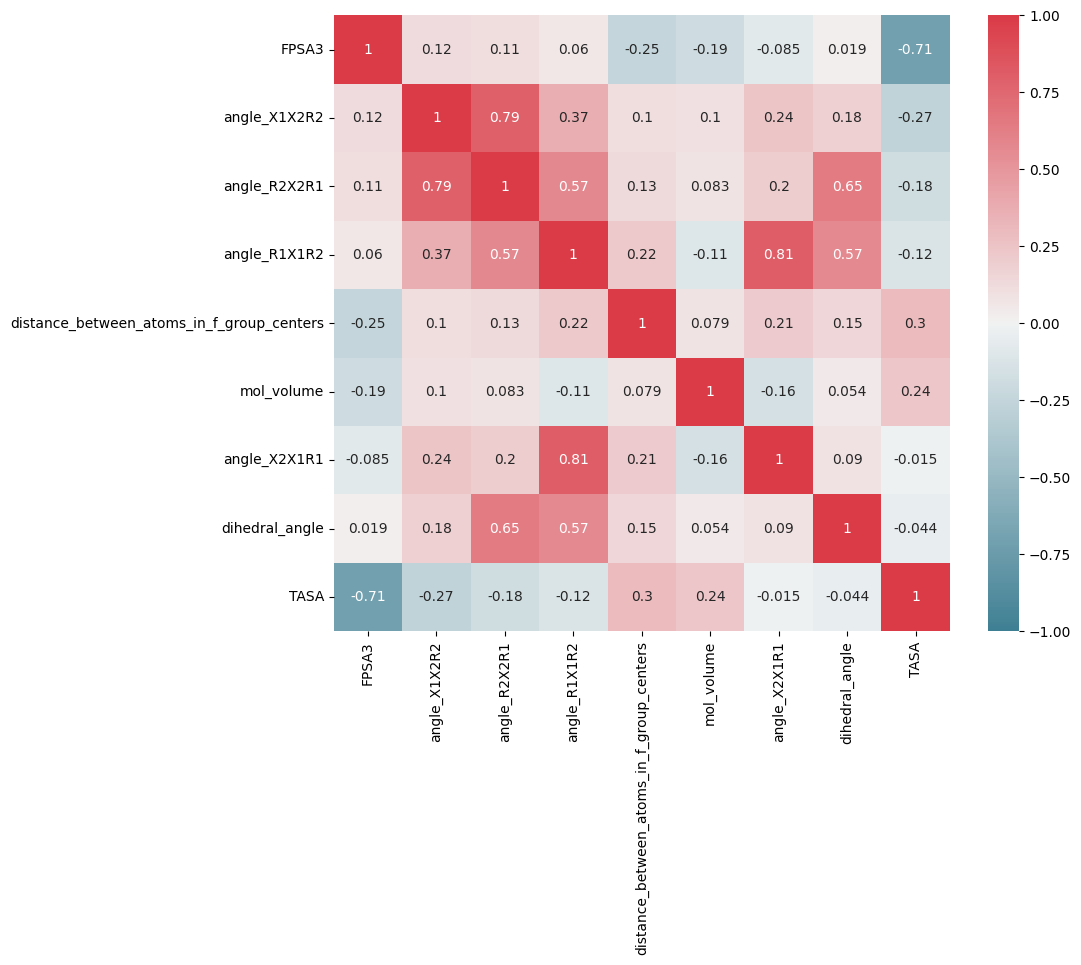

In [28]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = corr_matrix_normal
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax, annot=True)

<Axes: >

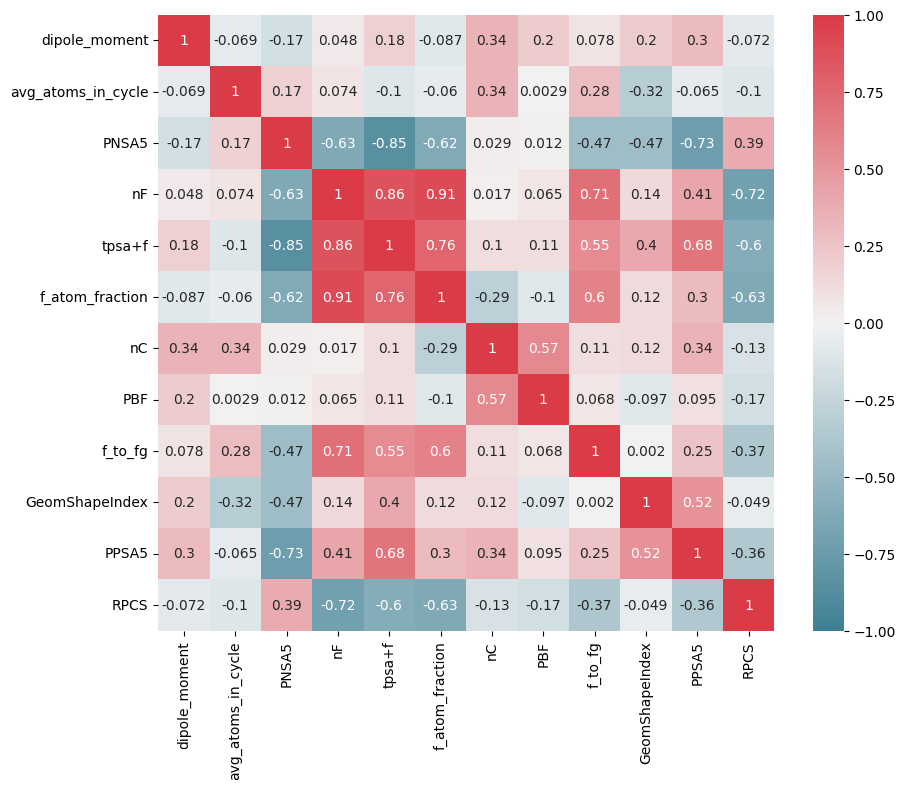

In [29]:
import seaborn as sns

f, ax = plt.subplots(figsize=(10, 8))
corr = corr_matrix_not_normal
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax, annot=True)

In [10]:
import pandas as pd
import numpy as np
from mordred import Calculator, descriptors
import pickle

from constants import mandatory_features

path = r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\updated_features\remained_features_pKa_08.02_v4_fixed_distances_chirality.csv'
smiles_filepath = r'C:\work\DrugDiscovery\main_git\XAI_Chem\data\updated_features\smiles_to_index.pkl'

df = pd.read_csv(path, index_col=0)

with open(smiles_filepath, 'rb') as handle:
    smiles_to_index = pickle.load(handle)


In [16]:
SMILES = list(smiles_to_index.keys())[list(smiles_to_index.values()).index(77)]
SMILES

'FC1(F)C2CNCC1CC(F)(F)C2'

In [17]:
SMILES = list(smiles_to_index.keys())[list(smiles_to_index.values()).index(78)]
SMILES

'FC1(F)C2CNCC1CCC2'

In [57]:
rpcs_more_100 = df[df['RPCS'] > 100][['logP', 'RPCS']]
rpcs_0 = df[df['RPCS'] < 0.5][['logP', 'RPCS']]

rpcs = pd.concat([rpcs_more_100, rpcs_0], axis=0)
rpcs.sort_index(inplace=True)
rpcs

,logP,RPCS
10,3.02,0.471683
11,2.72,0.157228
37,2.05,0.000000
41,2.88,0.478674
45,2.12,0.000000
57,2.31,0.000000
58,2.72,109.812670
60,2.19,109.499739
61,1.93,0.102319
66,2.20,0.108497


In [65]:
from rdkit import Chem
from rdkit.Chem import AllChem, rdPartialCharges

from constants import mandatory_features
from utils_3d import Molecule3DFeatures

def has_numbers(inputString):
    return any(char.isdigit() for char in inputString)

def obtain_mordred_features(mol):

    calc = Calculator(descriptors, ignore_3D=False)
    print(calc)
    df = calc.pandas([mol], quiet=True)

    mordred_dict = {}
    for value, row in df.iterrows():
        for key in row.keys():
            if "ring" in key.lower() and has_numbers(key):
                continue
            if type(row[key]) in [int, float]:
                mordred_dict[key] = row[key]

    return mordred_dict


In [47]:
SMILES = list(smiles_to_index.keys())[list(smiles_to_index.values()).index(96)]
SMILES

'FC1(F)CNCCC1'

In [74]:
for index, row in rpcs.iterrows():
    SMILES = list(smiles_to_index.keys())[list(smiles_to_index.values()).index(index)]
    

    molFeatures = Molecule3DFeatures(smiles=SMILES)
    mol_optimized = molFeatures.mol_optimized
    min_energy_conf_index = molFeatures.min_energy_conf_index

    # mordred_dict = obtain_mordred_features(mol_optimized)
    print(index, SMILES, row['logP'], row['RPCS'])

    rdPartialCharges.ComputeGasteigerCharges(mol_optimized)

    charges = []
    coordinates = []
    max_charge, sum_charges = 0, 0
    for atom in mol_optimized.GetAtoms():
        charge = atom.GetDoubleProp("_GasteigerCharge")

        if charge > max_charge: max_charge = charge

        if charge > 0: sum_charges += charge
        
        print(atom.GetSymbol(), atom.GetIdx(), charge)

    print("max charge", max_charge, "sum charges", sum_charges)

    print("-" * 30)

    # break

10 FC(F)(F)[C@@H]1C[C@@H](C(O)=O)C1 3.02 0.4716831759309227
F 0 -0.1708422234479412
C 1 0.39137021825278834
F 2 -0.1708422234479412
F 3 -0.1708422234479412
C 4 0.05651761037189538
C 5 -0.028349082763465025
C 6 0.05786835158956237
C 7 0.30602042796456774
O 8 -0.4810261395178465
O 9 -0.25214937258022624
C 10 -0.028349082763465025
H 11 0.03961803841038214
H 12 0.02813564690113614
H 13 0.02813564690113614
H 14 0.04218429859814824
H 15 0.29627881517693777
H 16 0.02813564690113614
H 17 0.02813564690113614
max charge 0.39137021825278834 sum charges 1.3024003479688266
------------------------------
11 FC(F)(F)[C@H]1C[C@@H](C(O)=O)C1 2.72 0.1572277253103075
F 0 -0.1708422234479412
C 1 0.39137021825278834
F 2 -0.1708422234479412
F 3 -0.1708422234479412
C 4 0.05651761037189538
C 5 -0.028349082763465025
C 6 0.05786835158956237
C 7 0.30602042796456774
O 8 -0.4810261395178465
O 9 -0.25214937258022624
C 10 -0.028349082763465025
H 11 0.03961803841038214
H 12 0.02813564690113614
H 13 0.0281356469011361